,Missing (%),Unique Values,Data Type,Sample Value
PassengerId,0.0%,418,int64,892
Survived,0.0%,2,int64,0
Pclass,0.0%,3,int64,3
Name,0.0%,418,object,"Kelly, Mr. James"
Sex,0.0%,2,object,male
Age,20.6%,79,float64,34.5
SibSp,0.0%,7,int64,0
Parch,0.0%,8,int64,0
Ticket,0.0%,363,object,330911
Fare,0.2%,169,float64,7.8292


C:\Users\Naveen\AppData\Local\Temp\ipykernel_5968\185296899.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['First', 'Second', 'Third'])
C:\Users\Naveen\AppData\Local\Temp\ipykernel_5968\185296899.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Perished', 'Survived'])
C:\Users\Naveen\AppData\Local\Temp\ipykernel_5968\185296899.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['Perished', 'Survived'])


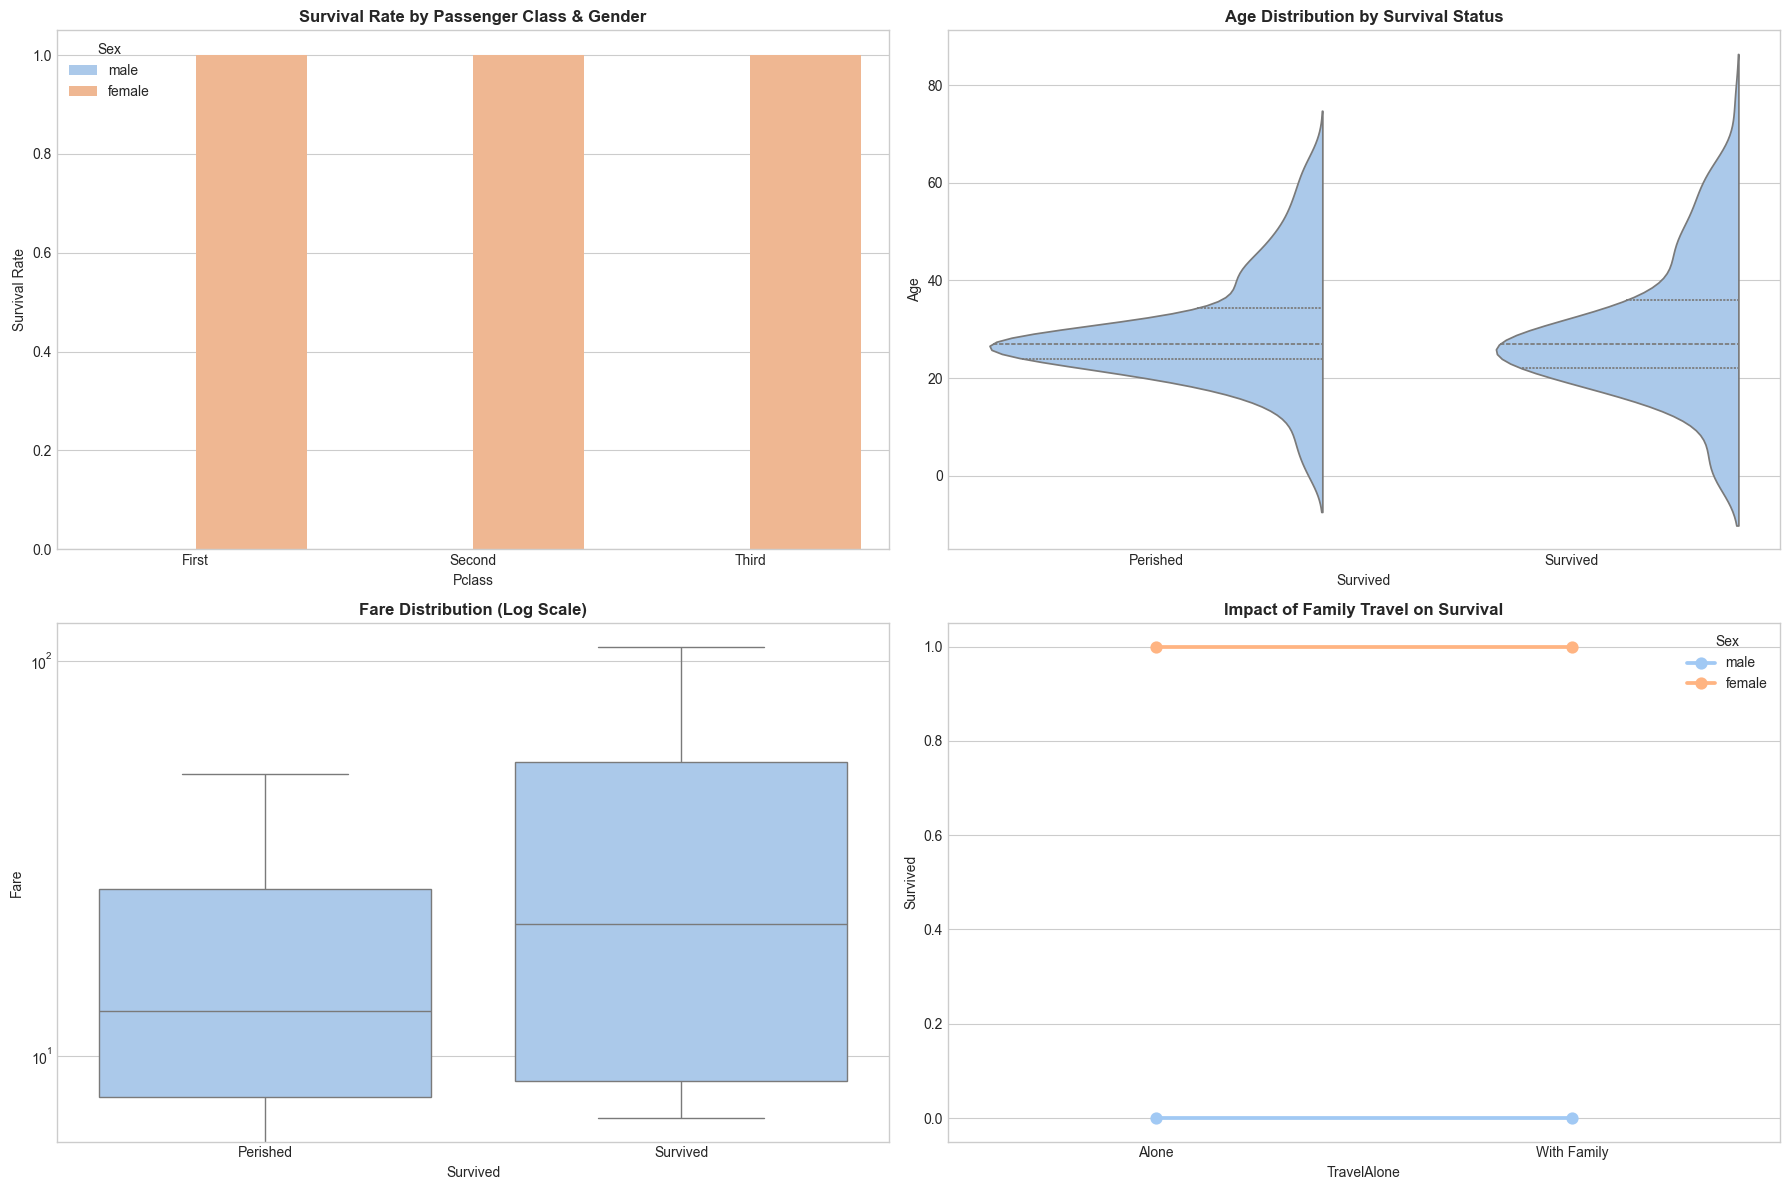

C:\Users\Naveen\AppData\Local\Temp\ipykernel_5968\185296899.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_with_survived.values, y=corr_with_survived.index,


<Figure size 1000x800 with 0 Axes>

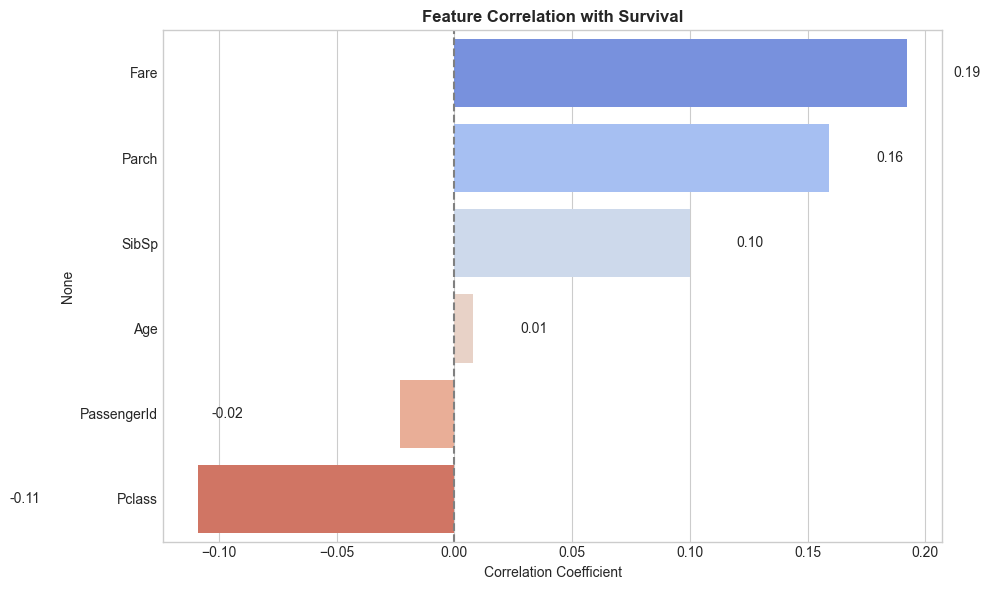

,count,mean,std,min,1%,25%,50%,75%,99%,max,IQR
PassengerId,418.00,1100.50,120.81,892.00,896.17,996.25,1100.50,1204.75,1304.83,1309.00,208.50
Survived,418.00,0.36,0.48,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
Pclass,418.00,2.27,0.84,1.00,1.00,1.00,3.00,3.00,3.00,3.00,2.00
Age,418.00,29.60,12.70,0.17,0.93,23.00,27.00,35.75,63.83,76.00,12.75
SibSp,418.00,0.45,0.90,0.00,0.00,0.00,0.00,1.00,4.00,8.00,1.00
Parch,418.00,0.39,0.98,0.00,0.00,0.00,0.00,0.00,4.00,9.00,0.00
Fare,418.00,35.58,55.85,0.00,6.45,7.90,14.45,31.47,262.38,512.33,23.58


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Load data with error handling
try:
    file_path = r"e:\OneDrive\Desktop\tested.csv"
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Configure global styles - updated style name for newer versions
try:
    plt.style.use('seaborn-v0_8-whitegrid')  # For newer versions
except:
    sns.set_style("whitegrid")  # Alternative approach
sns.set_palette("pastel")

HTML("""
<style>
    .analysis-title {color: #2c3e50; font-weight: bold; border-bottom: 2px solid #3498db; padding: 5px 0}
    .data-insight {background: #f8f9fa; padding: 15px; border-radius: 5px; margin: 10px 0}
</style>
""")

# Enhanced data summary
def display_data_summary():
    display(HTML("<div class='analysis-title'>🚢 Titanic Dataset Summary</div>"))
    
    # Create comprehensive summary
    summary = pd.DataFrame({
        'Missing (%)': df.isna().mean().round(4) * 100,
        'Unique Values': df.nunique(),
        'Data Type': df.dtypes,
        'Sample Value': df.iloc[0]
    }).style.format({'Missing (%)': '{:.1f}%', 'Sample Value': lambda x: str(x)[:25]})
    
    display(summary.highlight_null(subset=['Missing (%)'], color='#ffcccc'))
    
    # Key metrics
    metrics = {
        'Median Age': f"{df['Age'].median():.1f} years",
        'Max Fare': f"${df['Fare'].max():.2f}",
        'Overall Survival Rate': f"{df['Survived'].mean()*100:.1f}%"
    }
    display(HTML("<div class='data-insight'>🔍 Key Metrics:<br>" + 
                 "<br>".join([f"• {k}: {v}" for k,v in metrics.items()]) + "</div>"))

display_data_summary()

# Data preprocessing
def preprocess_data():
    # Handle missing values
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    
    # Create new features
    df['TravelAlone'] = np.where((df['SibSp'] + df['Parch']) > 0, 'With Family', 'Alone')
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['AgeGroup'] = pd.cut(df['Age'], 
                           bins=[0, 12, 18, 35, 60, 100],
                           labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
    return df

df = preprocess_data()

# Enhanced survival analysis
def analyze_survival():
    # Survival by class
    survival_class = df.groupby('Pclass')['Survived'].mean() * 100
    display(HTML("<div class='analysis-title'>📈 Survival Analysis</div>"))
    
    # Create visualization grid
    fig = plt.figure(figsize=(18, 12), dpi=100)
    gs = fig.add_gridspec(2, 2)
    
    # Survival by Class & Gender
    ax1 = fig.add_subplot(gs[0, 0])
    sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, 
               errorbar=None, ax=ax1)
    ax1.set_title('Survival Rate by Passenger Class & Gender', fontweight='bold')
    ax1.set_ylabel('Survival Rate')
    ax1.set_xticklabels(['First', 'Second', 'Third'])
    
    # Age distribution
    ax2 = fig.add_subplot(gs[0, 1])
    sns.violinplot(x='Survived', y='Age', data=df, split=True, 
                  inner='quartile', ax=ax2)
    ax2.set_title('Age Distribution by Survival Status', fontweight='bold')
    ax2.set_xticklabels(['Perished', 'Survived'])
    
    # Fare distribution
    ax3 = fig.add_subplot(gs[1, 0])
    sns.boxplot(x='Survived', y='Fare', data=df, 
               showfliers=False, ax=ax3)
    ax3.set_yscale('log')
    ax3.set_title('Fare Distribution (Log Scale)', fontweight='bold')
    ax3.set_xticklabels(['Perished', 'Survived'])
    
    # Family impact
    ax4 = fig.add_subplot(gs[1, 1])
    sns.pointplot(x='TravelAlone', y='Survived', hue='Sex', 
                 data=df, errorbar=None, ax=ax4)
    ax4.set_title('Impact of Family Travel on Survival', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

analyze_survival()

# Advanced correlation analysis - Completely fixed
def show_correlations():
    plt.figure(figsize=(10, 8))
    
    # Calculate correlation matrix for numeric columns only
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr = df[numeric_cols].corr()
    
    # Create a bar plot instead of a heatmap for a clearer visualization
    # Sort correlations with Survived
    corr_with_survived = corr['Survived'].sort_values(ascending=False)
    
    # Drop Survived itself from the plot (correlation = 1.0)
    corr_with_survived = corr_with_survived.drop('Survived')
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=corr_with_survived.values, y=corr_with_survived.index, 
                   palette='coolwarm', orient='h')
    
    # Add value labels
    for i, v in enumerate(corr_with_survived.values):
        ax.text(v + 0.02 if v >= 0 else v - 0.08, i, f"{v:.2f}", va='center')
    
    plt.title('Feature Correlation with Survival', fontweight='bold')
    plt.xlabel('Correlation Coefficient')
    plt.axvline(x=0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()

show_correlations()

# Interactive visualization (optional)
try:
    import plotly.express as px
    display(HTML("<div class='analysis-title'>🌐 Interactive Analysis</div>"))
    
    fig = px.sunburst(df, path=['Pclass', 'Sex', 'AgeGroup'], 
                     values='Fare', color='Survived',
                     color_continuous_scale='Blues')
    fig.update_layout(
        title='Survival Patterns: Class → Gender → Age Group',
        margin=dict(t=40, l=0, r=0, b=0)
    )
    fig.show()
    
except ImportError:
    print("Install plotly for interactive visualizations: pip install plotly")

# Enhanced statistical summary
def show_statistical_summary():
    display(HTML("<div class='analysis-title'>📊 Statistical Summary</div>"))
    
    stats = df.describe(percentiles=[.01, .25, .5, .75, .99]).T
    stats['IQR'] = stats['75%'] - stats['25%']
    display(stats.style.format('{:.2f}').background_gradient(
        subset=['mean', '50%', 'std'], cmap='Blues'))

show_statistical_summary()